# 영화 추천 시스템

1. Demographic Flitering (인구통계학적 필터링) -> 호불호 없는 영화 추천(인기 많은 영화)
2. Content Based Filtering (컨텐츠 기반 필터링) -> 장르/감독/줄거리/시간적배경/주연배우 등 비슷한 영화 추천
3. Collaborative Flitering (협업 필터링) -> 비슷한 영화 취향을 가진 사람들을 매칭해서 영화 추천(내가 이때까지 본 영화를 기반으로 추천)

## 1. Demographic Filtering (인구통계학적 필터링)

In [2]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
# 컬럼명 같은지 알 수 있음
df1['title'].equals(df2['title'])

True

In [4]:
# movie_id를 id로 변경
df1.columns = ['id', 'title', 'cast', 'crew']
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [5]:
# tmdb_5000_credits.csv에서 title 제외
df1[['id', 'cast', 'crew']]

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [6]:
# id를 기준으로 파일 합치기
df2 = df2.merge(df1[['id', 'cast', 'crew']], on = 'id')
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


v = vote_count 영화의 총 평가 수
m =  df2['vote_count'].quantile(0.9) 차트에 포함되기 위한 최소한의 평가
R = vote_average 영화의 평균 평점
C = df2['vote_average'].mean() 전체 영화 평점의 평균

In [7]:
# 전체 평균
C = df2['vote_average'].mean()
C

6.092171559442016

In [8]:
# 상위 10퍼센트에 해당하는 평가 수를 가지는 영화
# 너무 적은 개수의 평가가 있으면 그 영화 제외 - 충분히 평가된 영화만을 사용
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [9]:
# 새로운 데이터프레임 생성
q_movies = df2.copy().loc[df2['vote_count'] >= m] # 평점 개수가 1838.4개 이상인 영화 구하기
q_movies.shape

(481, 22)

In [10]:
# vote_count 기준으로 정렬
# 가장 적은 평가 개수가 1840개, 가장 많은 평가 개수가 13752개
q_movies['vote_count'].sort_values()

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

In [11]:
# kaggle에 나와있는 공식을 함수로 만들어 줌
# x: 데이터
# weighted_rating 가중치
def weighted_rating(x, m = m, C = C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C) # kaggle에 나와있는 공식

In [12]:
# weighted_rating 함수로 뽑아낸 값을 score라는 컬럼으로 데이터프레임에 추가
q_movies['score'] = q_movies.apply(weighted_rating, axis = 1) # axis = 0은 세로, axis = 1은 가로(row) 적용
q_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [13]:
# score를 기준으로 내림차순 정렬
q_movies = q_movies.sort_values('score', ascending = False) # ascending = False로 하면 내림차순으로 정리

# 영화 TOP 10
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

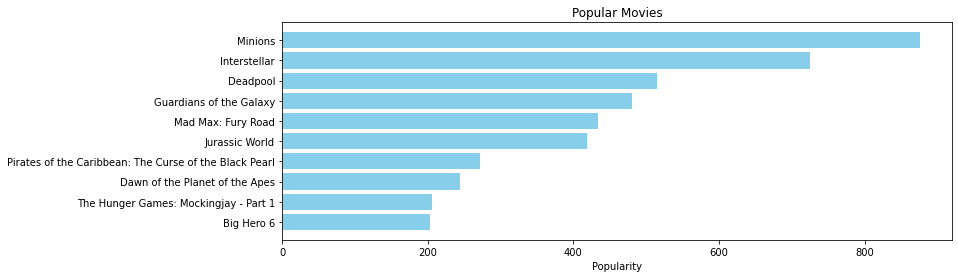

In [14]:
# score는 우리가 산정한 값 / popularity는 movies 데이터에서 자체적으로 제공한 값 -> 비교
import matplotlib.pyplot as plt

# popularity 기준으로 정렬
pop= df2.sort_values('popularity', ascending=False)

# popularity를 기준으로 영화 TOP 10
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

score와 popularity 결과 값이 다름

-> popularity 전체 데이터를 참고하지만 변화하는 데이터로 산정

=> 평점이 높은 영화

## 2. Content Based Filtering (컨텐츠 기반 필터링) - 줄거리 기반 추천

좋아하는 영화와 비슷한 영화 추천

In [15]:
# 줄거리 overview
# 줄거리를 분석해서 비슷한 영화 찾기
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

텍스트 분석을 위해서는 벡터화를 해야 함


Bag of Words - BOW
-> 텍스트에 포함된 모든 단어들이 순서와 상관없이 각각 몇 번씩 나왔는지 개수를 보는 것

벡터화 1: TfidfVectorizer (TF-IDF 기반의 벡터화) - 많이 나오지만 중요하지 않다고 판단되는 단어 제외 ex. the, a, i, am 등

벡터화 2: CountVectorizer - 있는 그대로 모든 단어의 개수를 세는 것

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

In [17]:
# overview에서 불필요한 단어 무시
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [18]:
# null값 유무
df2['overview'].isnull().values.any()

True

In [19]:
# null값에 빈칸 채우기
df2['overview'] = df2['overview'].fillna('')

In [20]:
# 피쳐 벡터화 - overview
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

# 4803개의 문서가 20978개의 단어로 이루어져있음

(4803, 20978)

In [21]:
# 125840개의 0이 아닌 데이터가 존재한다
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

단어 유사도 판단 - 코사인 유사도

In [22]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) # x, y
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

코사인 유사도

| | 문장 1 | 문장 2 | 문장 3 |
|---|---|---|---|
|문장 1|1|0.3|0.8|
|문장 2|0.3|1|0.5|
|문장 3|0.8|0.5|1|

-> 유사도가 가장 높은 문장을 찾을 때, 자신을 제외하고 유사도가 높은 문장

In [23]:
cosine_sim.shape

(4803, 4803)

In [24]:
# Series의 값: df2.index / index: title / drop_duplicates: 중복 제거
indices = pd.Series(df2.index, index = df2['title']).drop_duplicates() # Series 1차원 배열로 이해하면 됨
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [25]:
# 영화 title을 치면 인덱스 값이 나옴
indices['Avatar']

0

In [26]:
# 영화에 대한 정보 / [[3]]으로 하면 표로 나옴
df2.iloc[3] 

budget                                                          250000000
genres                  [{"id": 28, "name": "Action"}, {"id": 80, "nam...
homepage                               http://www.thedarkknightrises.com/
id                                                                  49026
keywords                [{"id": 849, "name": "dc comics"}, {"id": 853,...
original_language                                                      en
original_title                                      The Dark Knight Rises
overview                Following the death of District Attorney Harve...
popularity                                                      112.31295
production_companies    [{"name": "Legendary Pictures", "id": 923}, {"...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2012-07-16
revenue                                                        1084939099
runtime                               

In [27]:
# # lambda 설명

# def get_second(x):
#     return x[1]

# lst = ['인덱스', '유사도']
# print(get_second(lst))

# # 첫번째 x가 전달받는 값
# (lambda x: x[1])(lst)

In [28]:
# 영화의 제목을 입력받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화 목록 변환

def get_recommendations(title, cosine_sim = cosine_sim):
   
    # 영화 제목을 통해서 전체 데이터 기준 그 영화의 index 값 얻기
    idx = indices[title]

    # 코사인 유사도 매트릭스 (cosine_sim)에서 idx(영화 인덱스)에 해당하는 데이터를 (idx(출력값 인덱스), 유사도) 형태로 얻기
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 코사인 유사도 기준으로 내림차순 정렬
    # sort는 원본 리스트의 데이터를 직접 정렬한 결과에 따라 바꿈
    # sorted는 원본은 건드리지 않고 정렬된 새로운 데이터만 리스트로 만들어서 반환
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)

    # 자기 자신을 제외한 10개의 추천 영화를 슬라이싱(1번째에서 10번째)
    sim_scores = sim_scores[1:11] 

    # 추천 영화 목록 10개의 인덱스 정보 추출
    movie_indices = [i[0] for i in sim_scores]

    # 인덱스 정보(movie_indices)를 통해 영화 제목 추출
    return df2['title'].iloc[movie_indices]
  

In [29]:
# 함수 적용 - 줄거리를 기반으로 한 영화 10개 추천
get_recommendations('Apollo 18')

1275                        Sunshine
311     The Adventures of Pluto Nash
0                             Avatar
487                       Red Planet
847                         Semi-Pro
635                        Apollo 13
2626                      Idle Hands
3624                            Moon
4108       In the Shadow of the Moon
3618          Force 10 from Navarone
Name: title, dtype: object

## 2. Content Based Filtering (컨텐츠 기반 필터링) - 다양한 요소 기반 추천(장르, 감독, 키워드 등)

In [30]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [32]:
# 문자열 데이터를 자료형으로 변환
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [33]:
df2.loc[0, 'crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [36]:
# 감독 정보 추출 Director
def get_director(x):
    for i in x:
        if i ['job'] == 'Director':
            # 감독 이름
            return i['name']
    # 감독 정보 없는 영화는 nan으로 처리
    return np.nan

In [37]:
df2['director'] = df2['crew'].apply(get_director)
df2['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

In [38]:
# 출연배우 정보
df2.loc[0, 'cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [39]:
# 장르 정보
df2.loc[0, 'genres']

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [40]:
# 키워드 정보
df2.loc[0, 'keywords']

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [41]:
# 처음 3개의 데이터 중에서 name에 해당하는 value만 추출
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    # 데이터가 없거나 알 수 없는 형태일 경우 빈 값(예상하지 못한 값)
    return []

In [42]:
features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [43]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [44]:
# 빈칸 없애고 소문자로 바꾸기
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ','')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ',''))
        else:
                return ''

In [45]:
features = ['cast', 'keywords', 'genres', 'director']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [46]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
